In [1]:
import pandas as pd 
import numpy as np

df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [11]:
x=df.iloc[:,3:].values

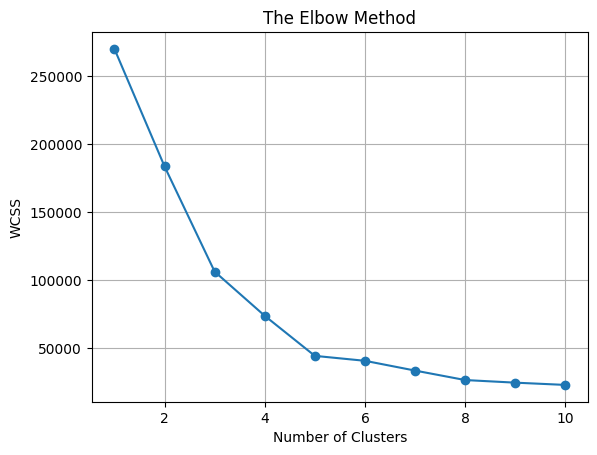

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()



In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


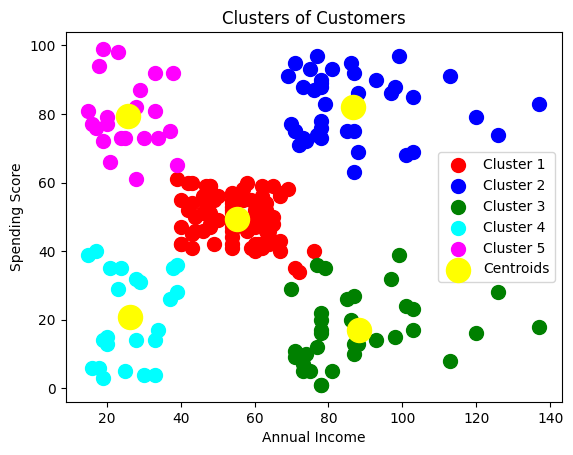

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

# Labels
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

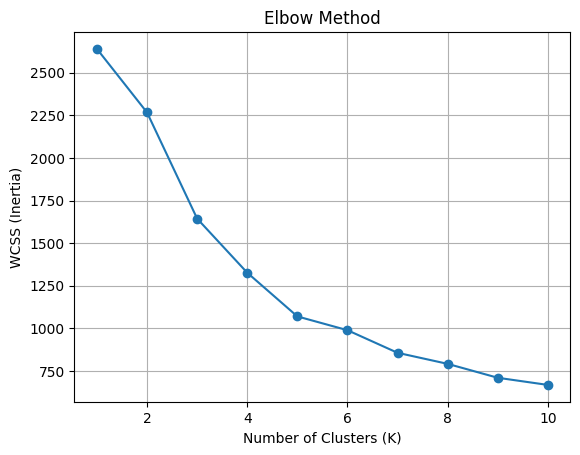

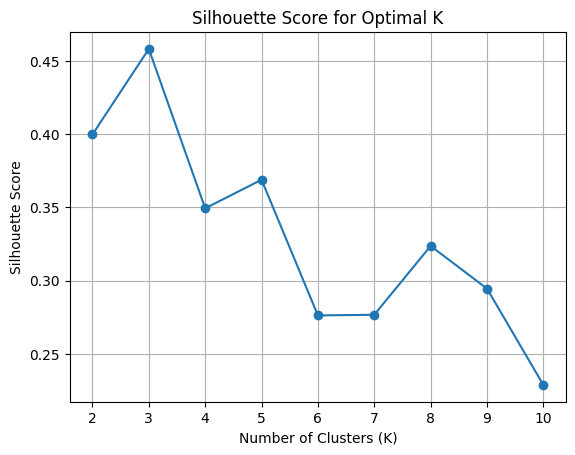

Cluster
3    314
0    109
2     10
1      7
Name: count, dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,3


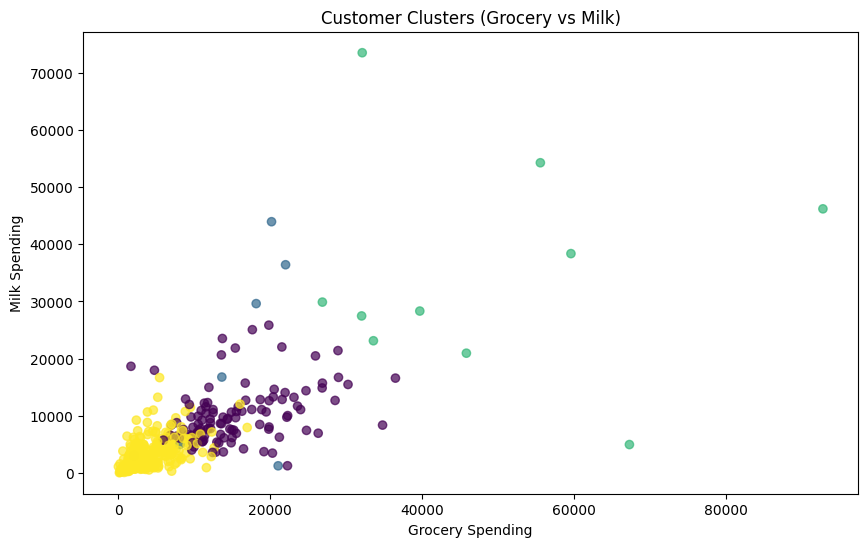

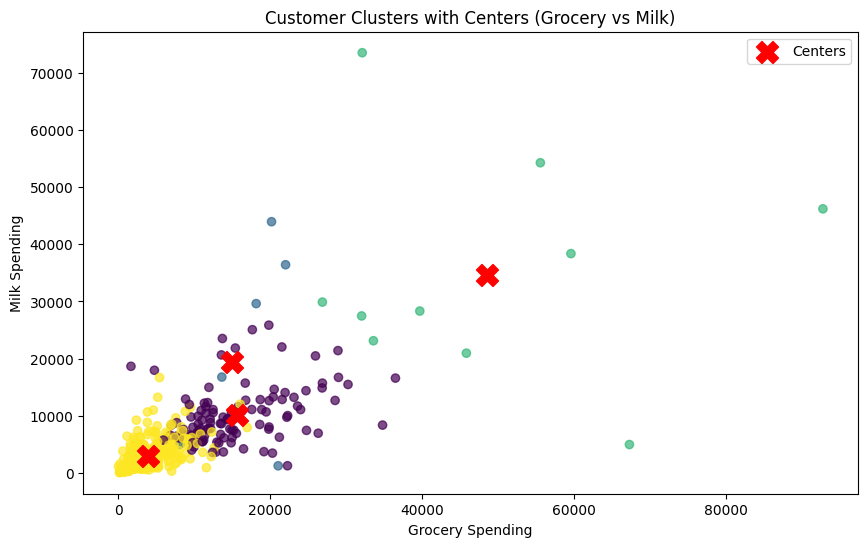

                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5474.926606  10194.192661  15587.807339   1464.385321   
1        40136.857143  19452.142857  15026.285714  23713.714286   
2        15964.900000  34708.500000  48536.900000   3054.600000   
3        13511.964968   3044.394904   3850.121019   3170.350318   

         Detergents_Paper    Delicassen  
Cluster                                  
0             6734.642202   1642.458716  
1             2374.142857  15735.142857  
2            24875.200000   2942.800000  
3              854.808917   1122.105096  



Cluster 0
Fresh                5474.926606
Milk                10194.192661
Grocery             15587.807339
Frozen               1464.385321
Detergents_Paper     6734.642202
Delicassen           1642.458716
dtype: float64

Cluster 1
Fresh               40136.857143
Milk                19452.142857
Grocery             15026.285714
Frozen              23713.714286
Detergents_Paper     2374.142857
Delicassen          15735.142857
dtype: float64

Cluster 2
Fresh               15964.9
Milk                34708.5
Grocery             48536.9
Frozen               3054.6
Detergents_Paper    24875.2
Delicassen           2942.8
dtype: float64

Cluster 3
Fresh               13511.964968
Milk                 3044.394904
Grocery              3850.121019
Frozen               3170.350318
Detergents_Paper      854.808917
Delicassen           1122.105096
dtype: float64


In [25]:
strategies = {
    0: "Offer bulk discounts on groceries + detergents for this high-spending retail segment.",
    1: "Promote fresh and frozen goods with priority delivery for hotels/restaurants.",
    2: "Provide combo deals and loyalty rewards to increase order size for low spenders.",
    3: "Upsell premium delicassen and seasonal packs for mixed-category buyers."
}

for c in sorted(df["Cluster"].unique()):
    print(f"Cluster {c} Strategy: {strategies.get(c, 'Run personalized offers based on spending trend.')}")


Cluster 0 Strategy: Offer bulk discounts on groceries + detergents for this high-spending retail segment.
Cluster 1 Strategy: Promote fresh and frozen goods with priority delivery for hotels/restaurants.
Cluster 2 Strategy: Provide combo deals and loyalty rewards to increase order size for low spenders.
Cluster 3 Strategy: Upsell premium delicassen and seasonal packs for mixed-category buyers.


In [26]:
kmeans_1 = KMeans(n_clusters=optimal_k, random_state=42)
labels_1 = kmeans_1.fit_predict(X_scaled)

kmeans_2 = KMeans(n_clusters=optimal_k, random_state=99)
labels_2 = kmeans_2.fit_predict(X_scaled)

same = (labels_1 == labels_2).sum()
print("Same cluster assignments:", same, "out of", len(labels_1))


Same cluster assignments: 187 out of 440
